In [1]:
# Simple Linear Regression
"""
Created on Wed May  9 06:59:15 2018

@author: Shivendra
This is Simple Linear Model illustration code for ML training
"""
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Reading the Dataset

In [2]:
# Now, Lets import the data set
dataset = pd.read_csv('TaxiFareActualsData.csv')

In [3]:
dataset

,Distance,Fare
0,0.40,70
1,7.20,210
2,1.80,110
3,3.60,150
4,4.40,150
5,6.80,210
6,9.70,270
7,4.80,170
8,11.30,290
9,4.90,170


Slice the data and Divide the data between training and testing

In [4]:
distance = dataset.iloc[:, :-1].values
#distance = dataset['Distance'].values
fare = dataset.iloc[:, -1].values

In [5]:
distance

array([[ 0.4 ],
       [ 7.2 ],
       [ 1.8 ],
       [ 3.6 ],
       [ 4.4 ],
       [ 6.8 ],
       [ 9.7 ],
       [ 4.8 ],
       [11.3 ],
       [ 4.9 ],
       [12.2 ],
       [ 1.2 ],
       [ 2.6 ],
       [ 5.7 ],
       [18.2 ],
       [ 6.1 ],
       [13.2 ],
       [ 4.5 ],
       [ 0.9 ],
       [ 4.7 ],
       [ 6.11],
       [11.3 ],
       [ 7.6 ],
       [ 5.5 ]])

In [6]:
fare

array([ 70, 210, 110, 150, 150, 210, 270, 170, 290, 170, 310,  90, 130,
       190, 430, 190, 330, 170,  90, 170, 190, 290, 230, 190])

In [7]:
fare.shape

(24,)

In [8]:
distance.shape

(24, 1)

In [9]:
from sklearn.model_selection import train_test_split
distance_points_train, distance_points_test, fare_train, fare_test =\
train_test_split(distance, fare, test_size = 0.33,random_state = 0)

In [10]:
distance_points_train

array([[13.2],
       [11.3],
       [ 9.7],
       [ 4.5],
       [ 4.4],
       [ 1.8],
       [ 6.8],
       [ 0.9],
       [ 4.9],
       [ 4.8],
       [ 4.7],
       [ 3.6],
       [ 0.4],
       [11.3],
       [ 6.1],
       [ 2.6]])

In [11]:
fare_train

array([330, 290, 270, 170, 150, 110, 210,  90, 170, 170, 170, 150,  70,
       290, 190, 130])

Row wise correspondence is not changed in train test split

Lets Build the model

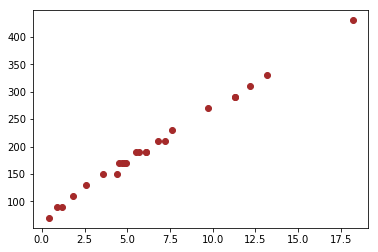

In [12]:
plt.scatter(distance, fare, color='brown')

In [45]:
# Fitting Simple Linear Regression Model to the taxi fare training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(distance_points_train, fare_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [14]:
regressor.coef_

array([19.52064424])

In [15]:
regressor.intercept_

73.97633588644821

Predict test results

In [16]:
# Predicting the Test set results
fare_pred = regressor.predict(distance_points_test)

In [17]:
distance_points_test

array([[ 1.2 ],
       [12.2 ],
       [ 7.6 ],
       [18.2 ],
       [ 6.11],
       [ 7.2 ],
       [ 5.7 ],
       [ 5.5 ]])

In [18]:
fare_pred

array([ 97.40110897, 312.12819561, 222.33323211, 429.25206105,
       193.24747219, 214.52497441, 185.24400805, 181.33987921])

In [19]:
fare_test

array([ 90, 310, 230, 430, 190, 210, 190, 190])

In [20]:
fare_test - fare_pred

array([-7.40110897, -2.12819561,  7.66676789,  0.74793895, -3.24747219,
       -4.52497441,  4.75599195,  8.66012079])

How to measure the total error

In [21]:
np.absolute(fare_test - fare_pred)

array([7.40110897, 2.12819561, 7.66676789, 0.74793895, 3.24747219,
       4.52497441, 4.75599195, 8.66012079])

In [22]:
np.square(fare_test - fare_pred)

array([54.77641405,  4.52921656, 58.7793299 ,  0.55941267, 10.54607563,
       20.47539343, 22.6194594 , 74.99769218])

In [23]:
fare_test.mean()

230.0

In [24]:
SSE = np.sum(np.square(fare_test 
                       - fare_pred))
print("SSE is : ",SSE )

SSE is :  247.2829938335709


SSE - Estimate of total squared error in the model for the evalaution data being used

In [25]:
print("MSE is : ", SSE/len(fare_pred))

MSE is :  30.910374229196364


MSE - Estimate of squared error per observation predicted

In [26]:
print("RMSE is : ", np.sqrt((SSE/len(fare_pred))))

RMSE is :  5.559709905129616


#RMSE : An estimate of aboslute error in the preeidction per observatiomn

Visualize results

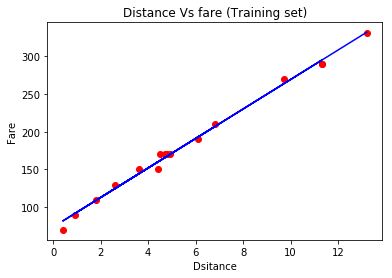

In [27]:
# Visualising the Training set results
plt.scatter(distance_points_train, fare_train, color = 'red')
plt.plot(distance_points_train, regressor.predict(distance_points_train), color = 'blue')
plt.title('Distance Vs fare (Training set)')
plt.xlabel('Dsitance')
plt.ylabel('Fare')
plt.show()

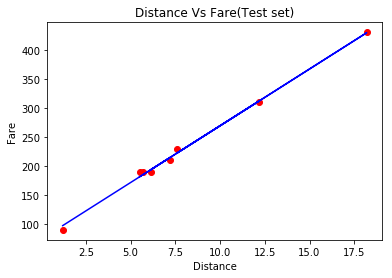

In [28]:
# Visualising the Test set results
plt.scatter(distance_points_test, fare_test, color = 'red')
plt.plot(distance_points_test, fare_pred, color = 'blue')
plt.title('Distance Vs Fare(Test set)')
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

In [29]:
#Efficiency or goodness of the models

In [30]:
# Goodness = Ability to hold good accuracy over large set of variations, diff data points, 
# chnage in data ranges etc

In [31]:
#These metrics predict how well the model will work for large sepctrum of unseen values

In [32]:
# We use SSE and SSR

In [33]:
print("SSE is : ",SSE )

SSE is :  247.2829938335709


What is SSR? Regression sum of squares

SSR measures how smart (strong) the model is compared to a dumb model
Dumb model - predicting outputvar.mean() as prediction for all input values

In [34]:
def SSR(real, pred):
    return(np.sum(np.square(pred-(real.mean()))))

In [35]:
print("SSR is: ", SSR(fare_test, fare_pred))

SSR is:  70048.8004663623


Goodness of the model = 1 - Error ratio = 1 - weakness ratio of the model

In [36]:
print("Goodness of the model : ", 1 - (SSE/SSR(fare_test, fare_pred)) )

Goodness of the model :  0.9964698468469518


In [37]:
regressor.coef_

array([19.52064424])

In [38]:
regressor.intercept_

73.97633588644821

In [39]:
print("SSE is : ",SSE )

SSE is :  247.2829938335709


In [47]:
def linearModel( x, m=10, c=10):
    return (m*x + c)

In [48]:
fare_pred = linearModel(distance_points_test)

In [89]:
fare_pred = fare_pred.reshape(8)

In [49]:
SSE = np.sum(np.square(fare_test 
                       - fare_pred))
print("SSE is : ",SSE )

SSE is :  1977561.6799999997


In [ ]:
#oroginal error

In [54]:
regressor.coef_[0]

19.52064423974537

In [52]:
fare_pred = linearModel(distance_points_test, regressor.coef_[0], regressor.intercept_)

In [59]:
fare_pred = fare_pred.reshape(8)

In [60]:
fare_pred

array([ 97.40110897, 312.12819561, 222.33323211, 429.25206105,
       193.24747219, 214.52497441, 185.24400805, 181.33987921])

In [57]:
fare_test

array([ 90, 310, 230, 430, 190, 210, 190, 190])

In [58]:
SSE = np.sum(np.square(fare_test 
                       - fare_pred))
print("SSE is : ",SSE )

SSE is :  247.2829938335709


In [ ]:
#For m = 10, c =10 SSE is :  1977561.6799999997

In [ ]:
#Lets increase m and check if error increases or dercrease

In [79]:
def findError( m, c):
    fare_pred = linearModel(distance_points_test, m, c)
    fare_pred = fare_pred.reshape(8)
    SSE = np.sum(np.square(fare_test 
                       - fare_pred))
    print("SSE is : ",SSE )
    return SSE

In [80]:
findError(10,10)

SSE is :  174963.21


174963.21

In [93]:
def dEupondm( x, y, m , c ):
    return (-2 * x* ( y-(m*x)-c))

In [102]:
der = dEupondm(distance_points_test[0], fare_test[0], 10,10 )

In [103]:
der

array([-163.2])

In [ ]:
#Since dE/dm os negative, we increase m

In [81]:
findError(12,10)

SSE is :  134864.46240000002


134864.46240000002

In [82]:
findError(15,10)

SSE is :  85084.2225


85084.2225

In [83]:
findError(19,10)

SSE is :  38063.948099999994


38063.948099999994

In [84]:
findError(19,15)

SSE is :  32768.848099999996


32768.848099999996

In [85]:
findError(19,25)

SSE is :  23378.6481


23378.6481

In [86]:
findError(19,45)

SSE is :  9398.2481


9398.2481

In [87]:
findError(19,70)

SSE is :  922.7480999999999


922.7480999999999

In [88]:
findError(19.52,73.97)

SSE is :  247.4179878400006


247.4179878400006

In [104]:
der = dEupondm(distance_points_test[0], fare_test[0], 19.52,73.97 )

In [105]:
der

array([17.7456])

In [106]:
der = dEupondm(distance_points_test[0], fare_test[0], 19.52064424,73.976335886 )

In [107]:
der

array([17.76266154])

In [110]:
der = dEupondm(distance_points_test[0], fare_test[0], 30,73.976335886 )

In [111]:
der

array([47.94320613])

In [112]:
der = dEupondm(distance_points_test[0], fare_test[0], 50,73.976335886 )

In [113]:
der

array([105.54320613])